In [89]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import func
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from sklearn import metrics

In [92]:
Y=np.loadtxt('fitY.csv',delimiter=',')
X=np.loadtxt('6cleveland.csv',delimiter=',',skiprows=True)

In [3]:
weight0=[1/3,2/3]
mean0=[165,185]
#分位数定均值初值
covs0=[10,10]
theta0=np.array([weight0,mean0,covs0])

In [19]:
res=np.array(func.iterECM(X,Y,theta0,N=1000,stopbyN= True))

In [43]:
res

array([array([-0.26070464, -0.96535547,  0.03112443,  0.00411309,  1.25190968,
       -1.48288911]),
       array([[  0.53054248,   0.46945752],
       [151.71574626, 170.75188407],
       [  9.10036979,   5.11129043]])], dtype=object)

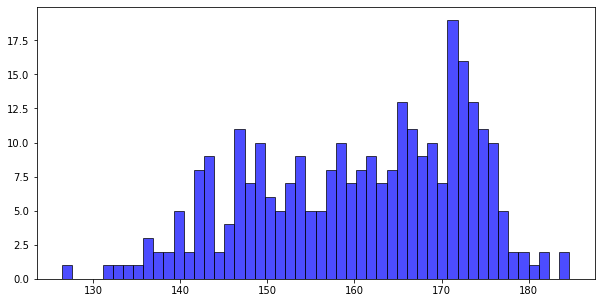

In [41]:
data=Y-np.dot(X,res[0])
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot()
ax1.hist(data, bins=50,  facecolor="blue", edgecolor="black", alpha=0.7)
plt.show()

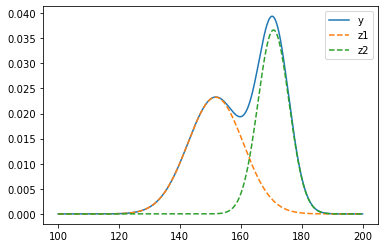

In [35]:
xnum = np.linspace(100,200,2000) # 从0到1，等分50分
high = func.mixnormal(xnum,res[1])
z1 = res[1][0,0]*func.normal(xnum,res[1][1:,0])
z2 = res[1][0,1]*func.normal(xnum,res[1][1:,1])
plt.figure() # 定义一个图像窗口
plt.plot(xnum,high) # 绘制曲线 y
plt.plot(xnum,z1,linestyle='--')
plt.plot(xnum,z2,linestyle='--')
plt.legend(['y','z1','z2'])
plt.show()

In [52]:
group=np.zeros((297,2))
group=func.Lih(data,res[1])
Hclass=np.zeros(297)
for i in range(297):
    Hclass[i]=group[i].argmax()

In [80]:
davies_bouldin_score(data[:,None], Hclass)

0.506569044784373